# Training a model to predict future personal consumption

## Scrape the data

Gather data from https://fred.stlouisfed.org/ on Personal Consumption Expenditures (PCE) each month from January 2011 to May 2021.

### Import necessary libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta

KeyboardInterrupt: 

### Create a ChromeDriver Instance

In [ ]:
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches', ['enable-logging'])
driver = webdriver.Chrome(options=options)

### Get data

In [ ]:
data = {'Month': [], 'PCE': []}
date = datetime.datetime(2011, 1, 1)
for i in range(125):
    year = date.year
    month = str(date.month).zfill(2)
    url = "https://fred.stlouisfed.org/release/tables?rid=54&eid=3220&od={}-{}-01#".format(year,month)
    driver.get(url)
    pce = driver.find_element_by_xpath('//*[@id="release-elements-tree"]/tbody/tr[1]/td[4]')
    print(pce.text)
    data['Month'].append(month + '-' + str(year))
    data['PCE'].append(pce.text)
    date = date + relativedelta(months=1)
driver.quit()

10,435.5
10,470.1
10,550.5
10,587.6
10,612.0
10,636.8
10,677.5
10,700.6
10,738.1
10,753.1
10,759.5
10,772.2
10,862.1
10,953.5
10,951.8
10,979.7
10,968.6
10,946.3
10,977.2
11,004.1
11,061.5
11,099.8
11,136.8
11,140.5
11,202.8
11,239.6
11,227.1
11,205.4
11,244.6
11,268.8
11,296.7
11,329.2
11,366.9
11,419.8
11,487.6
11,517.9
11,503.7
11,574.5
11,644.5
11,707.1
11,750.9
11,812.7
11,858.1
11,939.1
11,948.8
12,018.4
12,050.2
12,065.0
12,046.1
12,098.3
12,152.8
12,196.3
12,264.5
12,305.8
12,366.1
12,400.9
12,400.9
12,409.3
12,446.3
12,482.4
12,506.0
12,579.3
12,569.7
12,649.4
12,696.1
12,777.0
12,794.2
12,836.0
12,893.2
12,922.7
12,957.8
13,058.0
13,122.2
13,140.9
13,196.5
13,222.2
13,225.7
13,275.9
13,301.3
13,344.5
13,466.9
13,503.5
13,593.7
13,690.9
13,716.5
13,738.4
13,811.8
13,875.8
13,953.7
13,990.1
14,048.3
14,102.2
14,108.3
14,193.8
14,249.7
14,130.8
14,223.7
14,236.1
14,370.0
14,443.2
14,493.0
14,555.8
14,611.9
14,650.9
14,673.2
14,728.5
14,752.8
14,796.3
14,880.5
14,877.4
13,878.5
1

### Create a Pandas DataFrame

In [ ]:
df = pd.DataFrame(data)
df.to_pickle("df.pkl") #saves the dataframe locally
print(df)

       Month       PCE
0    01-2011  10,435.5
1    02-2011  10,470.1
2    03-2011  10,550.5
3    04-2011  10,587.6
4    05-2011  10,612.0
..       ...       ...
120  01-2021  14,921.1
121  02-2021  14,774.0
122  03-2021  15,515.3
123  04-2021  15,656.4
124  05-2021  15,659.3

[125 rows x 2 columns]


## Preprocessing the Data

### Import the necessary libraries

In [117]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

### Inspect and Clean the Dataset

In [118]:
df = pd.read_pickle("df.pkl")
df.shape

(125, 2)

In [119]:
month_col = pd.to_datetime(df.pop('Month'), format='%m-%Y')
month_col

0     2011-01-01
1     2011-02-01
2     2011-03-01
3     2011-04-01
4     2011-05-01
         ...    
120   2021-01-01
121   2021-02-01
122   2021-03-01
123   2021-04-01
124   2021-05-01
Name: Month, Length: 125, dtype: datetime64[ns]

In [120]:
df["PCE"] = df["PCE"].str.replace(",","").astype(float)

In [121]:
df.head()

,PCE
0,10435.5
1,10470.1
2,10550.5
3,10587.6
4,10612.0


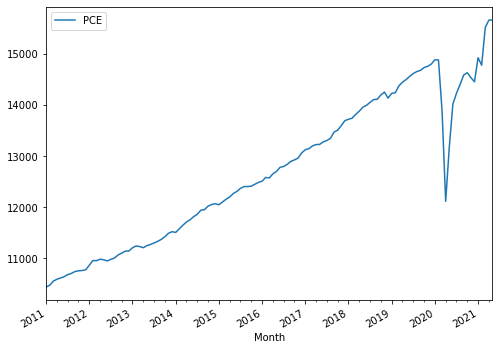

In [122]:
plot_cols = ['PCE']
plot_features = df[plot_cols]
plot_features
plot_features.index = month_col
_ = plot_features.plot(subplots=True)

In [123]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PCE,125.0,12696.5848,1432.423586,10435.5,11329.2,12569.7,14014.6,15659.3


In [124]:
timestamp_s = month_col.map(datetime.datetime.timestamp)
timestamp_s

0      1.293862e+09
1      1.296540e+09
2      1.298959e+09
3      1.301634e+09
4      1.304226e+09
           ...     
120    1.609481e+09
121    1.612159e+09
122    1.614578e+09
123    1.617253e+09
124    1.619845e+09
Name: Month, Length: 125, dtype: float64

### Split the data

In [125]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

### Normalize the data

In [126]:
scaler = StandardScaler()
train_df[['PCE']] = scaler.fit_transform(train_df[['PCE']])
val_df[['PCE']] = scaler.fit_transform(val_df[['PCE']])
test_df[['PCE']] = scaler.fit_transform(test_df[['PCE']])

C:\Users\anush\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Program Files\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Program Files\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

### Data Windowing

In [129]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [130]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns], axis = -1)
    
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [131]:
def plot(self, model=None, plot_col='PCE', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Month')

WindowGenerator.plot = plot

### Creating the Dataset

In [132]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(data=data, targets=None, sequence_length=self.total_window_size, sequence_stride=1, shuffle=True, batch_size=32,)
    ds = ds.map(self.split_window)
    return ds

WindowGenerator.make_dataset = make_dataset

In [133]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    # Example batch of inputs and labels
    result = getattr(self, '_example', None)
    if result is None:
        result = next(iter(self.train))
        self._example = result
    return result 

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example   

### Building the model

Total window size: 9
Input indices: [0 1 2 3 4 5]
Label indices: [6 7 8]
Label column name(s): None

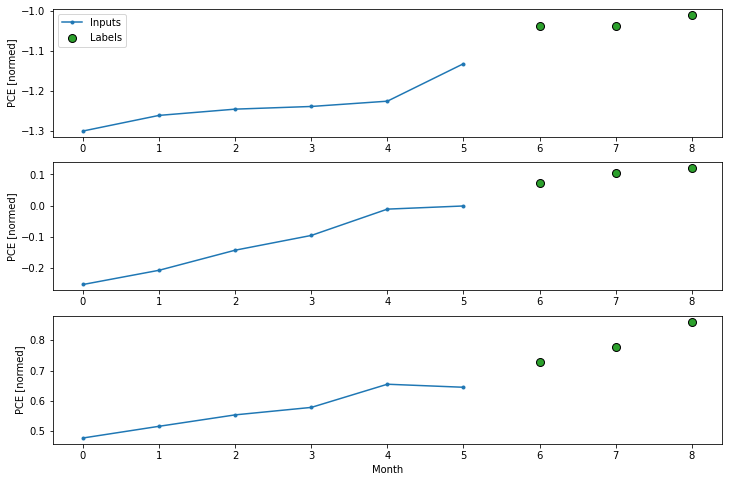

In [134]:
OUT_STEPS = 3
multi_window = WindowGenerator(input_width=6, label_width=OUT_STEPS, shift=OUT_STEPS)

multi_window.plot()
multi_window

In [135]:
model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.GRU(256, return_sequences=True),
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dropout(0.5),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(OUT_STEPS),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, 1])
])

In [136]:
MAX_EPOCHS = 20
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
model.fit(multi_window.train, epochs=MAX_EPOCHS, validation_data=multi_window.val, 
#callbacks=[early_stopping]
)

Epoch 1/20
3/3 [==============================] - 0s 104ms/step - loss: 0.5830 - mean_absolute_error: 0.6190 - val_loss: 0.7823 - val_mean_absolute_error: 0.4838
Epoch 2/20
3/3 [==============================] - 0s 36ms/step - loss: 0.1679 - mean_absolute_error: 0.3136 - val_loss: 0.6325 - val_mean_absolute_error: 0.3394
Epoch 3/20
3/3 [==============================] - 0s 20ms/step - loss: 0.1215 - mean_absolute_error: 0.2638 - val_loss: 0.7248 - val_mean_absolute_error: 0.3117
Epoch 4/20
3/3 [==============================] - 0s 21ms/step - loss: 0.1113 - mean_absolute_error: 0.2513 - val_loss: 0.7307 - val_mean_absolute_error: 0.3210
Epoch 5/20
3/3 [==============================] - 0s 19ms/step - loss: 0.0966 - mean_absolute_error: 0.2181 - val_loss: 0.6842 - val_mean_absolute_error: 0.3138
Epoch 6/20
3/3 [==============================] - 0s 19ms/step - loss: 0.0649 - mean_absolute_error: 0.1936 - val_loss: 0.6850 - val_mean_absolute_error: 0.3539
Epoch 7/20
3/3 [=================

In [137]:
val_performance = model.evaluate(multi_window.val)
val_performance

1/1 [==============================] - 0s 1ms/step - loss: 0.6803 - mean_absolute_error: 0.3445


[0.6802514791488647, 0.34452512860298157]

In [138]:
model.evaluate(multi_window.test, verbose=2)

1/1 - 0s - loss: 0.7705 - mean_absolute_error: 0.7213


[0.770450234413147, 0.7213477492332458]

In [139]:
multi_window.val

<MapDataset shapes: ((None, 6, 1), (None, 3, 1)), types: (tf.float32, tf.float32)>

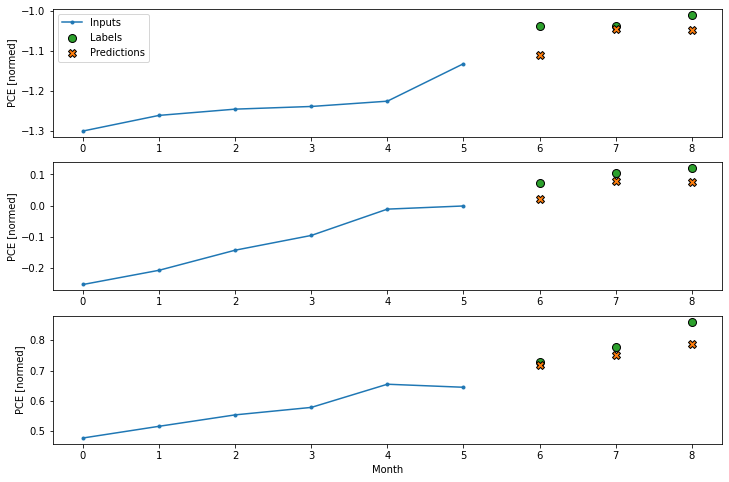

In [140]:
multi_window.plot(model)

In [153]:
# making predictions
input = [[6000], [6010], [6020], [6030], [6040], [6050]]
scaler = StandardScaler()
input_scaled = scaler.fit_transform(input)
print(input_scaled)
input_scaled = tf.stack([np.array(input_scaled)])
input_scaled.set_shape([None, 6, 1])
results = model.predict(input_scaled, verbose=0)
results

[[-1.46385011]
 [-0.87831007]
 [-0.29277002]
 [ 0.29277002]
 [ 0.87831007]
 [ 1.46385011]]


array([[[0.43344146],
        [0.6165847 ],
        [0.4382214 ]]], dtype=float32)

In [154]:
# scale results of prediction
inv_scale = scaler.inverse_transform([results])
inv_scale

[[[0.43344146]
  [0.6165847 ]
  [0.4382214 ]]]


### Saving the model

In [156]:
model.save('./model.h5')